In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('play_tennis.csv')

In [3]:
data.head()

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes


In [4]:
data.drop(columns=['day'], inplace=True)

In [5]:
data

,outlook,temp,humidity,wind,play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [6]:
# Problem 1

# Outlook=Sunny, Temp=Hot, Humidity=High, Wind=Weak
# Play or Not Play?

In [7]:
# Solution
# p(Yes | Sunny, Hot, High, Weak) = P(Sunny | Yes) * P(Hot | Yes) * P(High | Yes) * P(Weak | Yes) * P(Yes)
# p(No | Sunny, Hot, High, Weak) = P(Sunny | No) * P(Hot | No) * P(High | No) * P(Weak | No) * P(No)

# Compare and decide using the Maximum a posteriori rule 

In [8]:
# Training
# In training naive bayes create a look up table (Dictionary)

# Testing

In [9]:
# P(Yes) and P(No)

In [10]:
data['play'].value_counts()

play
Yes    9
No     5
Name: count, dtype: int64

In [11]:
py = 9/14
pn = 5/14

In [12]:
# Outlook

pd.crosstab(data['outlook'], data['play'])

play,No,Yes
outlook,,
Overcast,0,4
Rain,2,3
Sunny,3,2


In [13]:
POvercastNo = 0
PRainNo = 2/5
PSunnyNo = 3/5

POvercastYes = 4/9
PRainYes = 3/9
PSunnyYes = 2/9

In [14]:
# Temp

pd.crosstab(data['temp'], data['play'])

play,No,Yes
temp,,
Cool,1,3
Hot,2,2
Mild,2,4


In [15]:
PCoolNo = 1/5
PHotNo = 2/5
PMildNo = 2/5

PCoolYes = 3/9
PHotYes = 2/9
PMildYes = 4/9

In [16]:
# Humidity

pd.crosstab(data['humidity'], data['play'])

play,No,Yes
humidity,,
High,4,3
Normal,1,6


In [17]:
PHighNo = 4/5
PNoramalNo = 1/5

PHighYes = 3/9
PNormalYes = 6/9

In [18]:
# Wind

pd.crosstab(data['wind'], data['play'])

play,No,Yes
wind,,
Strong,3,3
Weak,2,6


In [19]:
PStrongNo = 3/5
PWeakNo = 2/5

PStrongYes = 3/9
PWeakYes = 6/9

In [20]:
# Outlook=Sunny, Temp=Hot, Humidity=High, Wind=Weak

Pyes = py * PSunnyYes * PHotYes * PHighYes * PWeakYes
print(Pyes)

0.007054673721340388


In [21]:
Pno = pn * PSunnyNo * PHotNo * PHighNo * PWeakNo
print(Pno)

0.02742857142857143


In [22]:
# No play answer

In [23]:
from sklearn.datasets import load_iris

In [24]:
X, y = load_iris(as_frame=True, return_X_y=True)

In [25]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [26]:
type(X)

pandas.core.frame.DataFrame

In [27]:
type(y)

pandas.core.series.Series

In [28]:
X['target'] = y

In [29]:
X.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
84,5.4,3.0,4.5,1.5,1
42,4.4,3.2,1.3,0.2,0
44,5.1,3.8,1.9,0.4,0
35,5.0,3.2,1.2,0.2,0
15,5.7,4.4,1.5,0.4,0


In [30]:
X['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [31]:
df_target0 = X[X['target'] == 0]

In [32]:
df_target1 = X[X['target'] == 1]

In [33]:
df_target2 = X[X['target'] == 2]

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\as233\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\as233\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\as233\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\as233\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


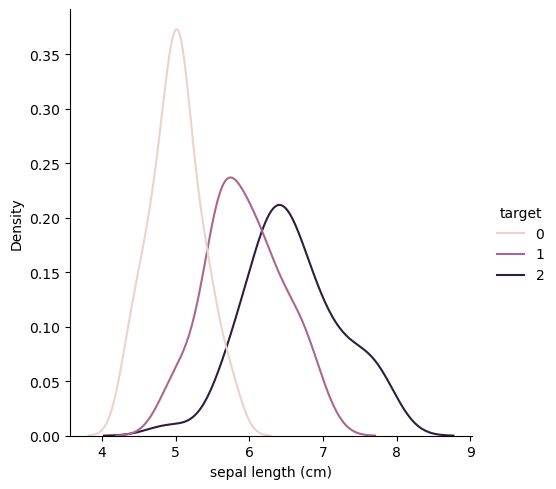

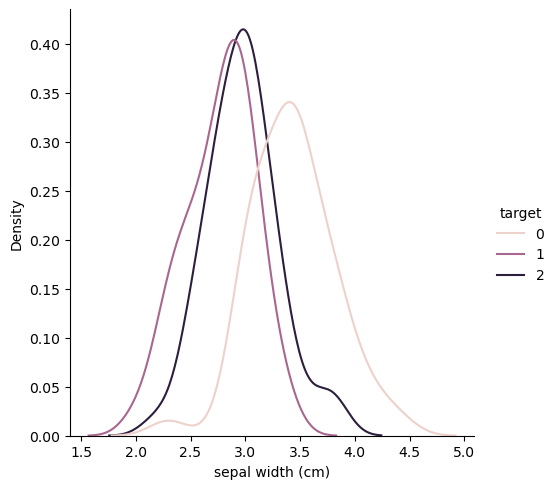

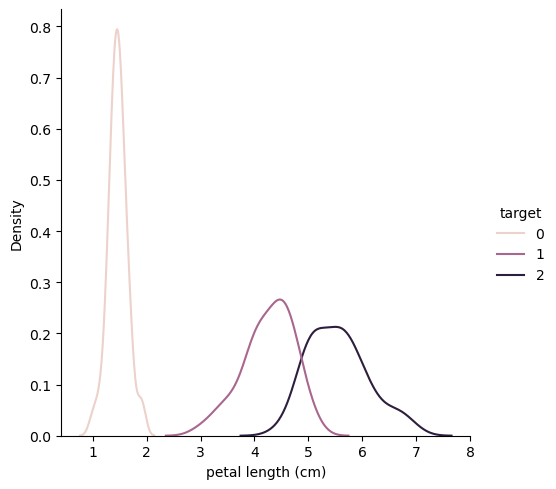

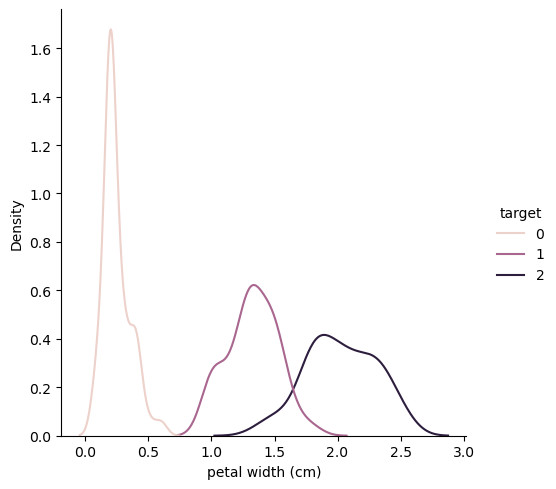

In [35]:
sns.displot(data=X, x='sepal length (cm)', hue = 'target',kind='kde')
sns.displot(data=X, x='sepal width (cm)', hue = 'target', kind='kde')
sns.displot(data=X, x='petal length (cm)', hue = 'target', kind='kde')
sns.displot(data=X, x='petal width (cm)', hue = 'target', kind='kde')
